#    &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span style="color:purple"> Investigating the role of immigration</span>

# &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span style="color:purple">  in the Belgian labour market.</span>



> ***This research aims to identify the long-term relationship between immigrant inflows and unemployment rate in Belgium***

>> For that purpose, the ***Engle-Granger*** (EG) two-step procedure is used to check for cointegration (=long-term relationship) between the unemployment rate and immigrant inflows. First, it is necessary to identify the order of integration of non-stationary variables.
The variables must be integrated of the same order, and the order must be I(1) to use EG methodlogy.

(
data sources : OECD database, Macrotrend, Eurostat, World Bank and
Statbel.)

In [21]:
library(urca)
library(tseries)
library(forecast)
library(tidyverse)
library(TSstudio)
library(stargazer)

In [ ]:
read.csv(file.choose())

## Data description

In [9]:
unem <- ts(dataset$Ur, start = 1960, end = 2019, frequency = 1)
im <- ts(dataset$im, start = 1960, end = 2019, frequency = 1)

### Variable immigrant inflow

The graph is based on a sample of 59 observations from 1960 to 2019. 

Two significant peaks during 1960-1980 are observed in 1964 and 1974. The observed peak in 1964 corresponds precisely to the year of the signature of the work convention with Morocco and Turkey. . After the peak of 1964, the number of immigrants declined. Belgium began to close the access of economic immigration slowly. A ministerial order aimed at controlling immigrant inflow was issued in 1967. In 1974, immigration was drastically reduced with restrictive immigration policies because of increased unemployment due to the economic crisis exacerbated by the oil crisis during 1973-1974. A significant reduction is then observed till 1983. 

After that, a new wave of Albanian immigrants appeared because of the repression in Belgrade. Additionally, more and more economic migrants try to enter as asylum-seekers. During 1990-2000, immigration rapidly increases till reaching more than fifty thousand immigrants.

Then, the period 2000-2010 shows a remarkable upsurge. The number of immigrants exceeds 100 000. During this period, immigration included Maghreb, Eastern Europe. The upward trend continued during 2011-2019 with refugees from Iran, Iraq, Afghanistan, and Syria.


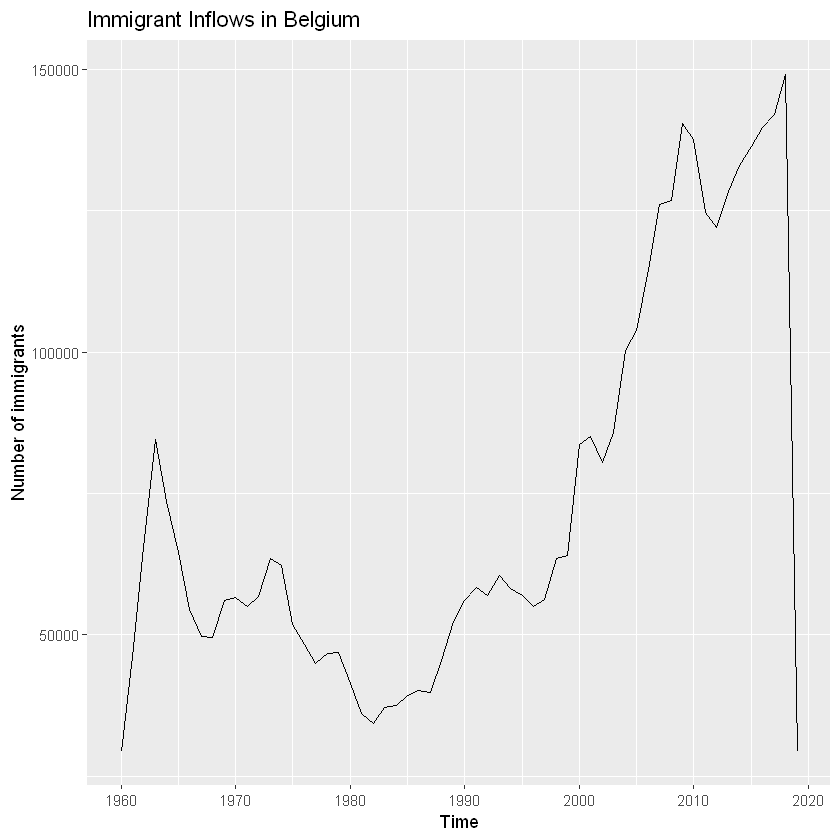

In [5]:
autoplot(im) + ggtitle("Immigrant Inflows in Belgium") +
  labs(x= "Time", y= "Number of immigrants")

*The table below summarises the statistics of immigration.*

In [27]:
stargazer(subset(dataset, select = c(im)), type = 'text', title = "Summary statistics on immigrant inflows")


Summary statistics on immigrant inflows
Statistic N     Mean     St. Dev.   Min   Pctl(25) Pctl(75)   Max  
-------------------------------------------------------------------
im        59 73,828.540 35,006.320 29,366 48,896.5 93,115.5 149,174
-------------------------------------------------------------------


##### Stationarity and order: Immigrant inflows time series

The autocorrelation and partial autocorrelation plots
allow examining the stationarity of variable Immigrant
Inflows graphically. 

A slow decay is observed in the ACF,
which is typical of an autoregressive model, and thus, it
is not stationary. The PACF suggests that this variable
may be modelled with an autoregressive model with a
parameter equals to 1 AR(1). This means that the
immigrant inflow that occurs today is explained by the
immigrant inflow of one year before.

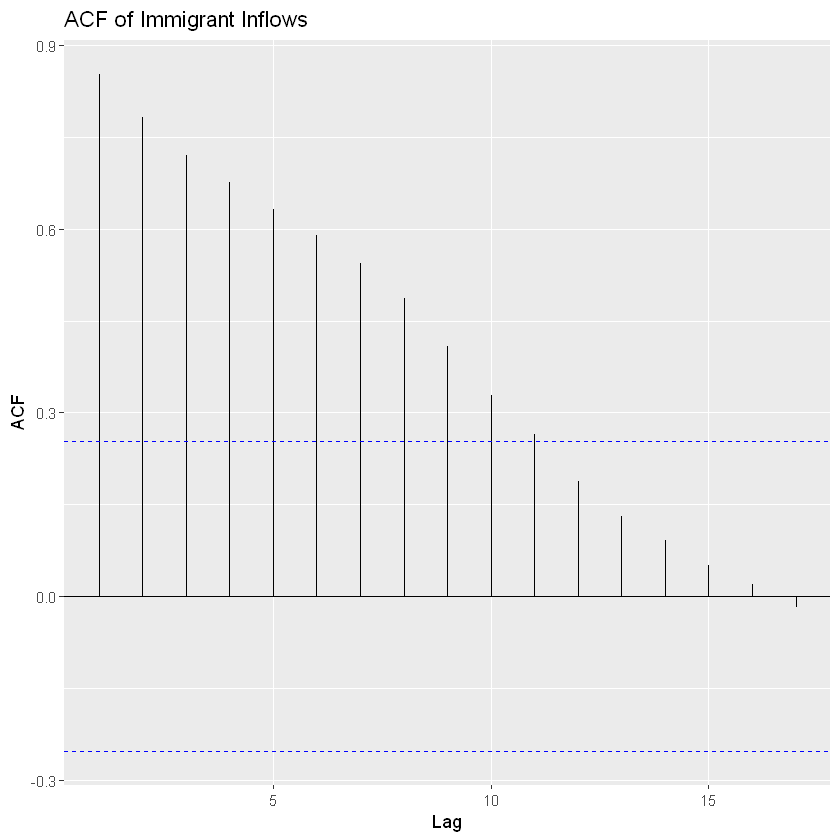

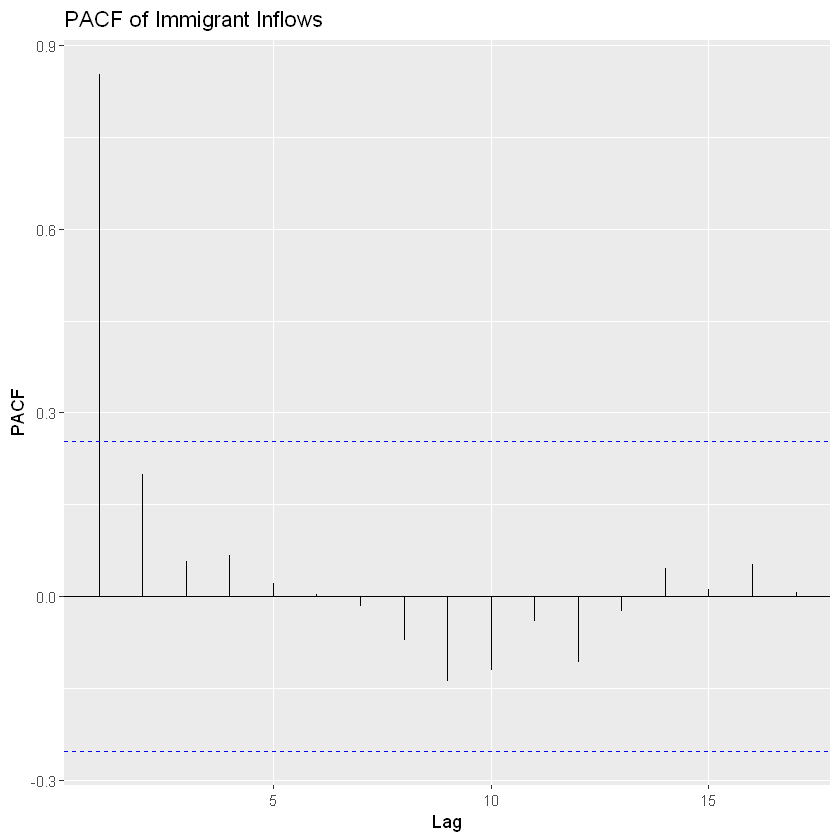

In [16]:
ggAcf(im)+ ggtitle("ACF of Immigrant Inflows") 
ggPacf(im)+ ggtitle("PACF of Immigrant Inflows")

Three tests for unit roots are used to confirm the graphical analysis.
Those 3 tests all validate the expectations from ACF
and PACF plots. The p-value of the ADF (Augmented
Dickey-Fuller) and PP (Phillips Perron) tests are greater
than 5 per cent, so the null hypothesis of nonstationarity cannot be rejected. Also, the p-value of the
KPSS test is very low, so the null hypothesis of
stationarity is rejected. It can be then concluded that the
variable immigrant inflow is not stationary at the level. 

In [15]:
adf.test(im)
PP.test(im)
kpss.test(im)


	Augmented Dickey-Fuller Test

data:  im
Dickey-Fuller = -1.9186, Lag order = 3, p-value = 0.6077
alternative hypothesis: stationary



	Phillips-Perron Unit Root Test

data:  im
Dickey-Fuller = -1.8092, Truncation lag parameter = 3, p-value = 0.6519


Warning message in kpss.test(im):
"p-value smaller than printed p-value"



	KPSS Test for Level Stationarity

data:  im
KPSS Level = 1.0364, Truncation lag parameter = 3, p-value = 0.01


##### Stationarity and order: Immigrant Inflows time series (Differenced)

The difference in time series is a method used to
transform a non-stationary variable into a stationary one.
It consists of differencing each value of the time series
from the previous one. The plots of ACF and PACF show
that the differenced variable is stationary as it can be
seen a rapid decrease below the confidence level (blue
line ) in the peaks. 


In [17]:
imd <- diff(im, 1)

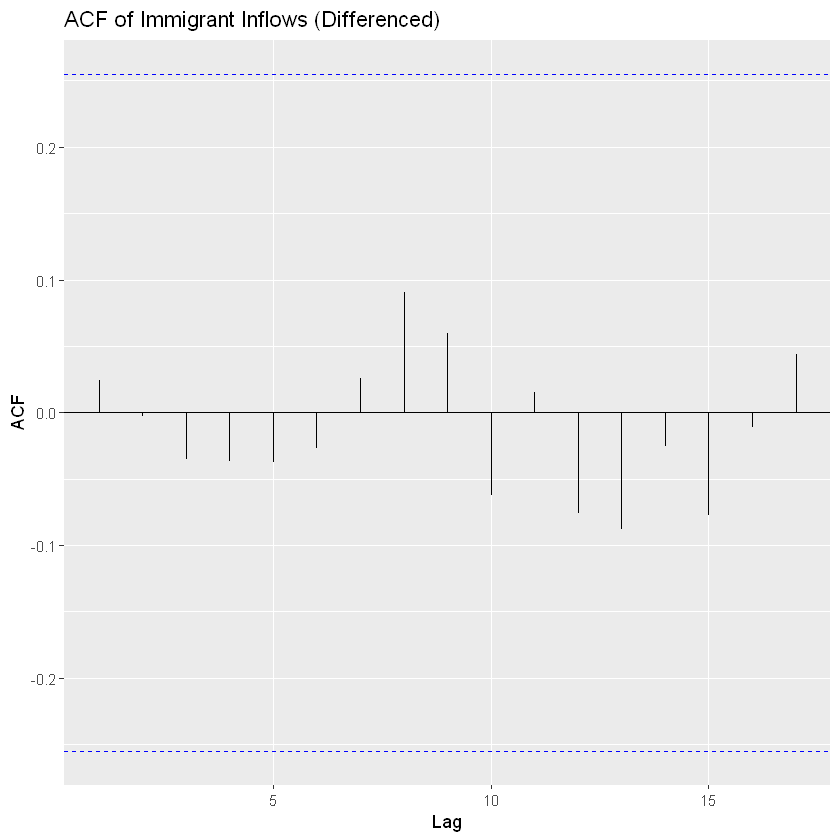

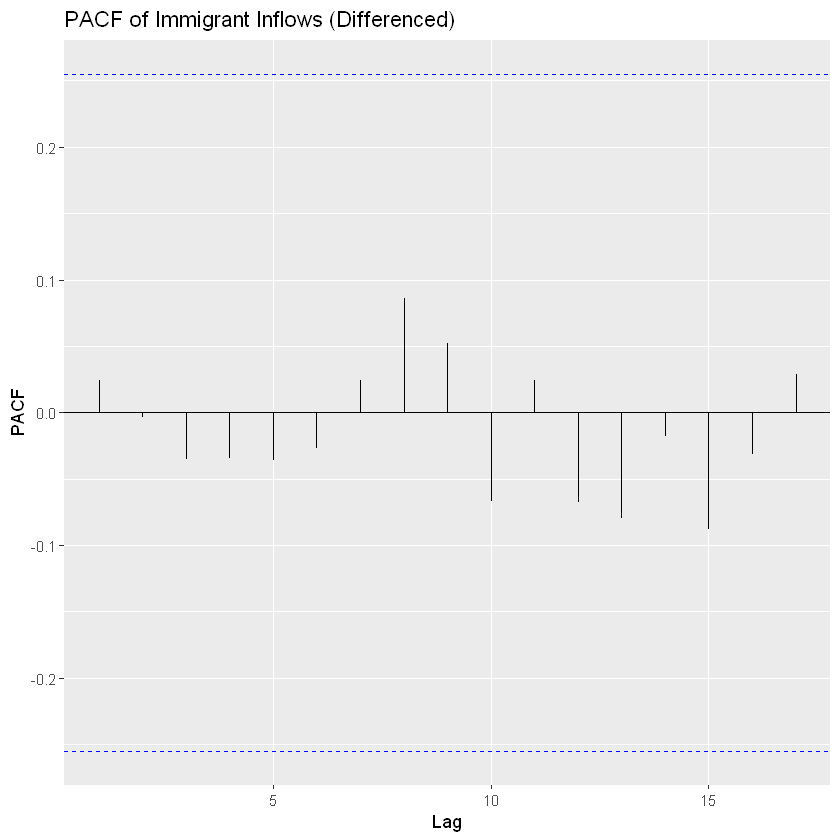

In [19]:
ggAcf(imd)+ ggtitle("ACF of Immigrant Inflows (Differenced)") 
ggPacf(imd)+ ggtitle("PACF of Immigrant Inflows (Differenced)")

The three tests below confirm the graphical analysis. All validate
the expectations from ACF and PACF plots. The p-value of
the ADF (Augmented Dickey-Fuller) and PP (Phillips
Perron) tests are lower than 5 per cent, so the null
hypothesis of non-stationarity can be rejected. Also, the
p-value of the KPSS test is very high, so the null hypothesis
of stationarity is not rejected. It can be then concluded
that the variable immigrant inflows differenced is
stationary and thus that the variable immigrant inflows is
integrated of order 1 I(1). 

In [20]:
adf.test(imd)
PP.test(imd)
kpss.test(imd)


	Augmented Dickey-Fuller Test

data:  imd
Dickey-Fuller = -1.4819, Lag order = 3, p-value = 0.784
alternative hypothesis: stationary



	Phillips-Perron Unit Root Test

data:  imd
Dickey-Fuller = -2.3051, Truncation lag parameter = 3, p-value = 0.4515


Warning message in kpss.test(imd):
"p-value greater than printed p-value"



	KPSS Test for Level Stationarity

data:  imd
KPSS Level = 0.17796, Truncation lag parameter = 3, p-value = 0.1


> <mark> Same process is undergone for the variables unemployment rate. It is concluded that the variable
unemployment rate differenced is stationary and thus that
the variable unemployment rate is integrated of order 1 I(1).</mark>

>> <mark> ***As both variables are integrated of order 1 I(1), it is possible to use Engle Granger procedure***</mark>

## Engle-granger procedure

The first step of the Engle-Granger model (EGM) is verifying cointegration between the two
time series. For that purpose, residuals from OLS regression of the two I(1) time series are
retrieved. For the variables immigration and unemployment rate, the OLS regression equation
is as follows

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; unemt = δ0 + δ1 imt + µt

where unem is the unemployment rate, im the immigrant inflows and µt the residual part.

In [25]:
model1 <- lm(unem~im)

From this OLS regression, the residual part is obtained after estimation of the OLS coefficients
in this way

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; µt = unemt - ̂δ0 - ̂δ1 imt


In [26]:
res_model1 <- model1$residuals
res_model1 <- ts(res_model1, start = 1960, end = 2019, frequency = 1)

Then, the residuals are tested for unit root. If there is no unit root, i.d. residuals are I(0) and
thus, stationary, the two time series are cointegrated, and the second step of the Engle-Granger model (EGM) can be undergone. If they are not cointegrated, there is no long-term
relationship, and the EGM procedure stops.

The Augmented Dickey-Fuller test is applied to check for unit roots. The null hypothesis ρ = 0
is tested against ρ < 0. In the model, the number of lags to include is determined by the Akaike
Information Criterion (AIC). Including lags on the model is necessary to eliminate serial
autocorrelation in the model. 

The model used incorporates one lag in the following equation

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; ∆µ̂ t = ρ ̂µt-1 + εt

As the value of the test-statistic (= -1.8337) is lower in absolute terms than the critical value
(= -1.95) with a confidence level of 95 per cent, the null hypothesis is not rejected.

In [27]:
adf1 <- ur.df(res_model1, type = "none", selectlags = "AIC")
stargazer(c(adf1@test.name,"T-stat", adf1@teststat,c(adf1@cval)) ,type = 'text', digits = 2)


Augmented Dickey-Fuller Test T-stat -1.83368795492458 -2.6 -1.95 -1.61
----------------------------------------------------------------------


The ACF (autocorrelation function) is plotted to confirm the
test. If residuals are stationary, the peaks in the plot should
rapidly decrease below the confidence level. However, as it can
be seen in the plot, a slow decline is observed, and thus the
graphical analysis confirms the results obtained by the ADF
(Augmented-Dickey Fuller) test. 

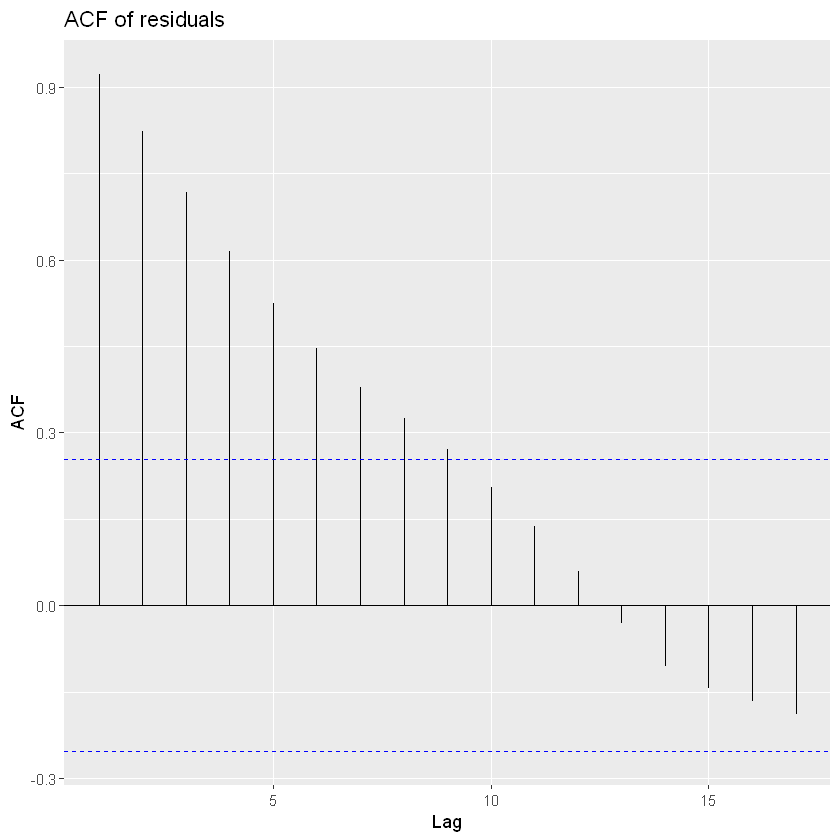

In [29]:
ggAcf(res_model1)+ ggtitle("ACF of residuals")

***Consequequently Engle-Granger procedure suggests no
long-term relationship between immigration and unemployment rate over the period 1960-2019.***

> It would be interesting to investigate the reason of the absence of relationship for future research. 
One path to investigate could be the amount of ***discouraged immigrant workers*** who do not search actively
for a job. As the unemployment rate definition requires that an individual of working age ***actively seeks*** for a
job, immigrants are not considered in calculating the indicator